<a href="https://colab.research.google.com/github/bjentwistle/PythonFundamentals/blob/main/Projects/Covid19_Vaccination_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Vaccination Data Visualisation Project

Explain the source of the data and the time frame it covers.

This data has been collated from many different government sources worldwide on vaccine numbers.
The first date is 14th Dec 2020 and the last data is 2nd May 2021, a small window into the vaccinations roll out round the world in a global pandemic. 



### Challenge 1 - prepare dataset for encoding 
---
1. Read Covid vaccination data from the `by_country` sheet in the Excel file at this link : https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true
2. Find out which columns have missing values
3. Remove all rows with missing data in the total_vaccination column  
4. Remove all rows with missing data in the daily_vaccinations_per_million 
5. find the median daily_vaccinations_per_million, storing this in a variable for use later     




In [89]:
import pandas as pd

#Read in the data from the By Country worksheet.
url = "https://github.com/bjentwistle/PythonFundamentals/blob/main/Datasets/Covid%20Vaccination%20Data%20edited.xlsx?raw=true"
vaccine_data = pd.read_excel(url, "by_country")

vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_ful

Small function to print out the maximum and minimum values of a given column.

In [73]:
def get_maxandmin(df,column): 
  print(df[column].min())
  print(df[column].max())

get_maxandmin(vaccine_data,"date")

2020-12-14 00:00:00
2021-05-02 00:00:00


# test for wordcloud

In [74]:
!pip install wordcloud

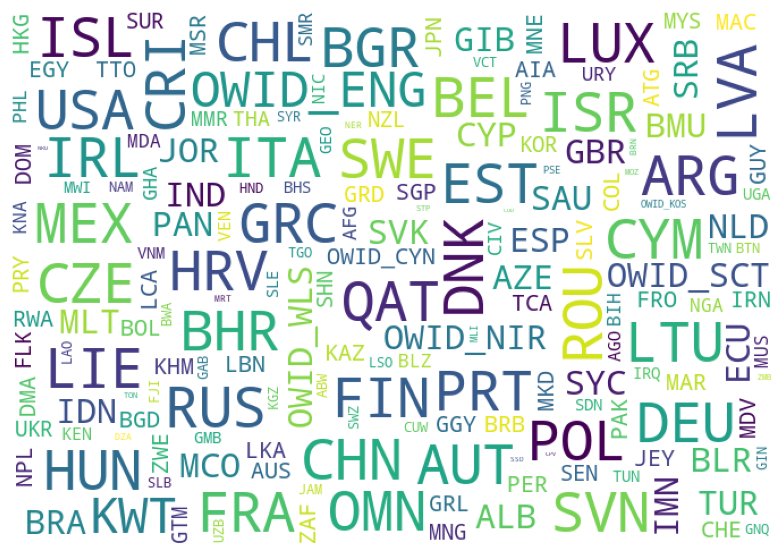

In [75]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(collocations=False, width=680, height=480,
                       margin=10, background_color='white', max_font_size = 50, 
                       repeat=False).generate(' '.join(vaccine_data.iso_code))
plt.figure(figsize=(20,10))
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

##14,994 rows of data with 15 columns (some with null data in)
The columns contain names of countries or numbers or vaccinations either by groups of one hundred or individuals and the date.

0	country - Country that the data was collected from.

1	 iso_code - a three letter abbreviation of the country, e.g. ALB for Albania.                        
2	date - the day on which that row of data was collected.                        
3   total_vaccinations - Total number of vaccinations that day?        
                       
3   total_vaccinations - Total number of vaccinations that day?        
4   people_vaccinated - ??

5   people_fully_vaccinated             
6   daily_vaccinations_raw              
7   daily_vaccinations                   
8   total_vaccinations_per_hundred       
9   people_vaccinated_per_hundred        
10  people_fully_vaccinated_per_hundred  
11  daily_vaccinations_per_million       
12  vaccines - list of the vaccine manufacturers used.                            
13  source_name - this refers to which Government department gave out the information.

For the purpose of this project I am only interested in rows that have data in the Total Vaccinations column. Hence all others are removed.


# Put table here from Word doc.

In [91]:
def remove_nulls(df,column):

  #Remove all rows with missing data in the given column 
  df_nulls_rm = df[~df[column].isnull()].reset_index(drop=True)
  #df_nulls_rm.reset_index()
  print(df_nulls_rm.head())

  return df_nulls_rm

vaccine_data_nonulls = remove_nulls(vaccine_data,"total_vaccinations" )
#now we have 9,011 rows and 15 columns (still some null values)
vaccine_data_nonulls = remove_nulls(vaccine_data_nonulls,"daily_vaccinations_per_million")
#now we have 8,819 rows and 15 columns (still some null values)

       country iso_code       date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG 2021-02-22                 0.0                0.0   
1  Afghanistan      AFG 2021-02-28              8200.0             8200.0   
2  Afghanistan      AFG 2021-03-16             54000.0            54000.0   
3  Afghanistan      AFG 2021-04-07            120000.0           120000.0   
4  Afghanistan      AFG 2021-04-22            240000.0           240000.0   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              2862.0   
3                      NaN                     NaN              3000.0   
4                      NaN                     NaN              8000.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                       

### Encode daily vaccinations 
---

Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

In [77]:
#Find the median daily_vaccinations_per_million, storing this in a variable for use later 
median_daily = vaccine_data_nonulls["daily_vaccinations_per_million"].median()

#Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0
#rename the dataframe to make it easier to follow the code below
df_encoded = vaccine_data_nonulls #this is the df with 8819 rows

def encode_daily(df, **kwds):
  median = kwds["median"]
  column = kwds["column"]

  if df[column] >= median:
    return 1
  else:
    return 0

df_encoded["above median"] = df_encoded.apply(encode_daily, axis=1, column = "daily_vaccinations_per_million", median = median_daily)
df_encoded.info()
#now we have 8,819 rows and now have 16 columns (new column for "above median")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8816 entries, 6 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              8816 non-null   object        
 1   iso_code                             8816 non-null   object        
 2   date                                 8816 non-null   datetime64[ns]
 3   total_vaccinations                   8816 non-null   float64       
 4   people_vaccinated                    8126 non-null   float64       
 5   people_fully_vaccinated              6143 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   8816 non-null   float64       
 8   total_vaccinations_per_hundred       8816 non-null   float64       
 9   people_vaccinated_per_hundred        8126 non-null   float64       
 10  people_full

###  Encoding total vaccinations   
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. Find the minimum total vaccinations for the United Kingdom 
2. Write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK

In [78]:
#Find the minimum total vaccinations for the United Kingdom 
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min = vaccine_data.loc[vaccine_data['country']== "United Kingdom", "total_vaccinations"].min()
print("UK Minimum = ", df_UK_min)


UK Minimum =  1402432.0


In [79]:
#Find the minimum total vaccinations for the United Kingdom 
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min = vaccine_data.loc[vaccine_data['country']== "United Kingdom", "total_vaccinations"].min()
print("UK Minimum = ", df_UK_min)

#Write a function to encode total_vaccinations column so that all values 
#less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1.
df_encoded_min = vaccine_data_nonulls 

def encode_above_Uk_min(df, **kwds):
  Min = kwds['minimum']
  column = kwds["column"]

  if df[column] >= Min:
    return 1
  else:
    return 0

df_encoded_min["above UK Minimum"] = df_encoded_min.apply(encode_above_Uk_min, axis=1, 
                                                          column = "total_vaccinations", minimum = df_UK_min)

df_encoded_min["above UK Minimum"].describe()

UK Minimum =  1402432.0


count    8816.000000
mean        0.304446
std         0.460199
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: above UK Minimum, dtype: float64

In [80]:
#Display the unique countries for which total vaccinated is at the same rate or more than the UK
def unique_countries(df):
  df = df[df["above UK Minimum"]==1]
  unique_countries = df["country"].unique()
  print("Unique countries = ", unique_countries.shape, unique_countries)
  return unique_countries

unique_countries = unique_countries(df_encoded_min)

Unique countries =  (59,) ['Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belgium'
 'Brazil' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia' 'Czechia'
 'Denmark' 'Dominican Republic' 'England' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Morocco' 'Nepal'
 'Netherlands' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Serbia'
 'Singapore' 'Slovakia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Wales']


In [82]:
print(vaccine_data_nonulls.country)

6        Afghanistan
22       Afghanistan
44       Afghanistan
59       Afghanistan
62           Albania
            ...     
14989       Zimbabwe
14990       Zimbabwe
14991       Zimbabwe
14992       Zimbabwe
14993       Zimbabwe
Name: country, Length: 8816, dtype: object


In [93]:
countries_total_vaccinations = {}
for country in unique_countries: 
  vaccinated = 0
  for i in range(len(vaccine_data_nonulls)): 
    if vaccine_data_nonulls.country[i] == country:
        vaccinated += vaccine_data_nonulls.daily_vaccinations[i]
  countries_total_vaccinations[country] = vaccinated 
#     made a seperate dict from the df 
  countries_total_vaccinations_df = pd.DataFrame.from_dict(countries_total_vaccinations,
                                                         orient='index',
                                                         columns = ['total_vaccinted_todate'])
#     converted dict to df 
countries_total_vaccinations_df.sort_values(by = 'total_vaccinted_todate', ascending = False, inplace = True)
countries_total_vaccinations_df

,total_vaccinted_todate
United States,230574326.0
China,191064042.0
India,142545476.0
United Kingdom,46233917.0
England,38657920.0
Brazil,37025502.0
Germany,28518902.0
Turkey,22842253.0
France,21033008.0
Italy,19470446.0


### Challenge 4 - create new series of total vaccinations for each manufacturer
---

To create a new column in your dataframe:

`df['new_column'] = ...`

For example:

* to duplicate an existing column
  * `df['new_column'] = df['old_column']`
* to add two columns together 
  * `df['new_column'] = df['column1'] + df['column2']`
* to make a percentages column 
  * `df['new_column'] = (df['column1']/df['column1].sum()) * 100`

  
1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 


**Test output**:

1.
2. 
```
vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64
```
3. 
```
	location	date	vaccine	total_vaccinations	percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055
...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423
3296 rows × 5 columns
```
4. 0.0011110194374896931
5. 
```
location	date	vaccine	total_vaccinations	percentage_of_total	encoded_percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055
...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423
3296 rows × 6 columns
```
6. 
```
	location	date	vaccine	total_vaccinations	percentages	encode	encoded
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003	0
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033	0
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053	0
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055	0
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055	0
...	...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095	1
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504	1
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519	1
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413	1
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423	1
3296 rows × 7 columns
```



In [ ]:
#import pandas as pd

# Task 1 read data from 'by_manufacturer' sheet from Covid data 
#url = "https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true"
url = "https://github.com/bjentwistle/PythonFundamentals/blob/main/Datasets/Covid%20Vaccination%20Data%20edited.xlsx?raw=true"
df_by_manufacturer = pd.read_excel(url, "by_manufacturer")

df_by_manufacturer.head(10)
#3,296 rows of data with 4 columns (No null data in)

In [ ]:
#Code from Chenjing who has been playing with plotting

import matplotlib.pyplot as plt
import seaborn as sns
data = df_by_manufacturer.groupby("vaccine")["total_vaccinations"].sum()
data = data
labels = data.keys()
#labels
colors = colors = sns.color_palette("bright")
plt.pie(data, labels = labels, colors = colors)
plt.show()

In [ ]:
#Task 2 - find the sum of total vaccinations for each manufacturer (use groupby here to find the sum for each vaccine)
sum_by_manufacturer =df_by_manufacturer.groupby("vaccine")["total_vaccinations"].sum()
sum_by_manufacturer

In [ ]:
#Task 3 - create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
    # to duplicate an existing column
    #     df['new_column'] = df['old_column']
    # to add two columns together
    #     df['new_column'] = df['column1'] + df['column2']
    # to make a percentages column
    #     df['new_column'] = (df['column1']/df['column1].sum()) * 100

df_by_manufacturer["total"] = df_by_manufacturer["total_vaccinations"].sum()
df_by_manufacturer["percentages"] = ((df_by_manufacturer['total_vaccinations']/df_by_manufacturer['total']) * 100)
df_by_manufacturer

In [ ]:
# Task 4 - find the median of the percentages
median_percentage = df_by_manufacturer["percentages"].median()
median_percentage

In [ ]:
#Task 5 - create a new column called 'encoded_percentages' which duplicates the percentages column
df_by_manufacturer["encoded_percentages"] = df_by_manufacturer["percentages"]

df_by_manufacturer

In [ ]:
#Task 6 - encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 

def encode_above_median(df, **kwds):
  median = kwds["percentage"]
  column = kwds["column"]
  if df[column] >= median:
    return 1
  else:
    return 0


df_by_manufacturer["encoded_percentages"] = df_by_manufacturer.apply(encode_above_median, axis = 1, percentage = median_percentage, column = "encoded_percentages")
df_by_manufacturer 


### Exercise 8 - encode daily vaccinations 

1. find the median daily vaccinations per 1 million 
2. write a function to encode daily vaccinations per 1 million, where values greater than or equal to median = 1 and values less than median = 0 

Output: 

1. 1915.5
2. 
```
0        0
6        0
22       0
44       0
59       0
        ..
14989    0
14990    0
14991    0
14992    0
14993    0
Name: daily_vaccinations_per_million, Length: 9011, dtype: int64
```

In [ ]:
# find the median daily vaccinations per 1 million 
median_daily_per_mil = df_nulls_rm['daily_vaccinations_per_million'].median()
median_daily_per_mil

In [ ]:
# write a function to encode daily vaccinations per 1 million, where values greater than or equal to median = 1 and values less than median = 0 
df_nulls_rm["encoded_above_median"] = df_nulls_rm['daily_vaccinations_per_million']
df_nulls_rm["encoded_above_median"] = df_nulls_rm.apply(encode_above_median, axis = 1, percentage = median_daily_per_mil, column = "encoded_above_median")
print(df_nulls_rm["encoded_above_median"])
# for my own interest I wanted to check if there were any 1's and for which countries
df_encode_above_median = df_nulls_rm[df_nulls_rm["encoded_above_median"]==1]
unique_countries = df_encode_above["country"].unique()
unique_countries

### Exercise 9 - Encoding vaccinations per hundred  
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. find the minimum total vaccinations for the United Kingdom 
2. save this value in a variable rounded down to an integer
3. write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
4. display the countries which total vaccinated is at the same rate or more than the UK

Output:

1. 1402432.0
2. 1402432
3. `df['people_vaccinated_per_hundred']` should output:
```
0        0
6        0
22       0
44       0
59       0
        ..
14989    0
14990    0
14991    0
14992    0
14993    0
Name: total_vaccinations, Length: 9011, dtype: int64
```
4. 
```
array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Wales'], dtype=object)
```




In [ ]:
#1 & 2 - find the minimum total vaccinations for the United Kingdom and save this value in a variable rounded down to an integer
#Filter the orgininal dataframe with all values in, using .loc to get the rows you want, ie United Kingdom only
df_UK_min_per_hundred = df.loc[df['country']== "United Kingdom", "total_vaccinations"].min()
df_UK_min_per_hundred = int(df_UK_min_per_hundred)
print("UK Minimum = ", df_UK_min_per_hundred)


In [ ]:
#3 - write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1
def encode_above_Uk_min(df, **kwds):
  Min = kwds['minimum']
  column = kwds["column"]

  if df[column] >= Min:
    return 1
  else:
    return 0

df_encoded_min["above UK Minimum"] = df_encoded_min.apply(encode_above_Uk_min, axis=1, column = "total_vaccinations", minimum = df_UK_min_per_hundred)

df_encoded_min["above UK Minimum"].describe()
#df_encoded_min.describe()


### Exercise 10 - create new series of total vaccinations percentages
---

To create a new column in your dataframe:

`df['new_column'] = ...`

For example:

* to duplicate an existing column
  * `df['new_column'] = df['old_column']`
* to add two columns together 
  * `df['new_column'] = df['column1'] + df['column2']`
* to make a percentages column 
  * `df['new_column'] = (df['column1']/df['column1].sum()) * 100`  
  


1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 


Output:

1.
2. 
```
vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64
```
3. 
```
	location	date	vaccine	total_vaccinations	percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055
...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423
3296 rows × 5 columns
```
4. 0.0011110194374896931
5. 
6. 
```
	location	date	vaccine	total_vaccinations	percentages	encode	encoded
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003	0
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033	0
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053	0
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055	0
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055	0
...	...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095	1
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504	1
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519	1
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413	1
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423	1
3296 rows × 7 columns
```



# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: